In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import ScalarMappable
from matplotlib import patches
import ipywidgets as widgets
sns.set_style('whitegrid')
sns.set_color_codes()
sns.set_context('poster')
%matplotlib notebook

In [2]:
data = pd.read_csv('./hw_2_data/flowers.csv')

In [3]:
def plot_features(feature_list, color_by):
    axes = []
    if color_by.dtype not in (int, float):
        categories = color_by.unique()
        palette = sns.color_palette(palette='husl', n_colors=len(categories))
        colormap = {cat: palette[i] for i, cat in enumerate(categories)}
        colors = [colormap[color] for color in color_by]
        handles = [patches.Patch(color=colormap[cat]) for cat in categories]
        labels = categories
    else:
        colormap = ScalarMappable(cmap='viridis')
        colormap.set_array(color_by)
        colors = colormap.to_rgba(color_by)
    n_features = len(feature_list)
    fig = plt.figure(figsize=(3*n_features, 3*n_features))
    for i in range(n_features):
        for j in range(i+1):
            ax = plt.subplot(n_features, n_features, n_features*i+j+1)
            ax.set_xlim(min(feature_list[j]), max(feature_list[j]))
            ax.set_ylim(min(feature_list[i]), max(feature_list[i]))
            ax.scatter(feature_list[j], feature_list[i], color=colors, linewidth=0)
            if j != 0:
                plt.setp(ax.get_yticklabels(), visible=False)
            else:
                ax.set_ylabel(feature_list[i].name)
            if i != n_features-1:
                plt.setp(ax.get_xticklabels(), visible=False)
            else:
                ax.set_xlabel(feature_list[j].name)
            axes.append(ax)
    if color_by.dtype not in (int, float):
        fig.legend(handles=handles, labels=labels, bbox_to_anchor=(0.9, 0.9), title=color_by.name)
    else:
        fig.colorbar(colormap, ax=axes, label=color_by.name)
    return fig

In [207]:
class Brusher(object):
    
    def __init__(self, data, feature_list, color_by):
        self.data = data
        self.feature_list = feature_list
        self.color_by = color_by
        self.plot()
        
        self.x0 = None
        self.x1 = None
        self.y0 = None
        self.y1 = None
        self.select_axis = None
        self.rect = None
        self.cids = []
        self.is_pressed = False
        self.connect()
        
    def plot(self):
        self.axes_info = {}
        if self.color_by.dtype not in (int, float):
            categories = self.color_by.unique()
            palette = sns.color_palette(palette='husl', n_colors=len(categories))
            colormap = {cat: palette[i] for i, cat in enumerate(categories)}
            colors = [colormap[color] for color in self.color_by]
            handles = [patches.Patch(color=colormap[cat]) for cat in categories]
            labels = categories
        else:
            colormap = ScalarMappable(cmap='viridis')
            colormap.set_array(self.color_by)
            colors = colormap.to_rgba(self.color_by)
        n_features = len(self.feature_list)
        self.fig = plt.figure(figsize=(3*n_features, 3*n_features))
        for i in range(n_features):
            for j in range(i+1):
                ax = plt.subplot(n_features, n_features, n_features*i+j+1)
                ax.set_xlim(min(self.feature_list[j]), max(self.feature_list[j]))
                ax.set_ylim(min(self.feature_list[i]), max(self.feature_list[i]))
                ax.scatter(self.feature_list[j], self.feature_list[i], color=colors, linewidth=0)
                self.axes_info[ax] = [self.feature_list[j], self.feature_list[i]]
                if j != 0:
                    plt.setp(ax.get_yticklabels(), visible=False)
                else:
                    ax.set_ylabel(self.feature_list[i].name)
                if i != n_features-1:
                    plt.setp(ax.get_xticklabels(), visible=False)
                else:
                    ax.set_xlabel(self.feature_list[j].name)
        if self.color_by.dtype not in (int, float):
            self.fig.legend(handles=handles, labels=labels, bbox_to_anchor=(0.9, 0.9), title=self.color_by.name)
        else:
            self.fig.colorbar(colormap, ax=axes, label=self.color_by.name)
        
    def connect(self):
        self.cids.append(self.fig.canvas.mpl_connect('button_press_event', self.on_click))
        self.cids.append(self.fig.canvas.mpl_connect('motion_notify_event', self.on_motion))
        self.cids.append(self.fig.canvas.mpl_connect('button_release_event', self.on_release))
        
    def on_click(self, event):
        if self.rect is not None:
            self.rect.remove()
        self.x0 = event.xdata
        self.y0 = event.ydata
        self.rect = patches.Rectangle((self.x0, self.y0), 0, 0, fc='k', alpha=0.1, linewidth=2)
        self.select_axis = event.inaxes
        self.select_axis.add_patch(self.rect)
        self.is_pressed = True
                
    def on_motion(self, event):
        if self.is_pressed and event.inaxes == self.select_axis:
            self.x1 = event.xdata
            self.y1 = event.ydata
            self.rect.set_width(self.x1 - self.x0)
            self.rect.set_height(self.y1 - self.y0)
            self.select_axis.draw_artist(self.rect)
            self.fig.canvas.blit(self.select_axis.bbox)

    def on_release(self, event):
        if self.is_pressed and event.inaxes == self.select_axis:
            self.x1 = event.xdata
            self.y1 = event.ydata
            self.rect.set_width(self.x1 - self.x0)
            self.rect.set_height(self.y1 - self.y0)
            self.select_axis.draw_artist(self.rect)
            self.fig.canvas.blit(self.select_axis.bbox)
        self.is_pressed = False
        self.get_data_from_selected_axis()
    
    def disconnect(self):
        [self.fig.canvas.mpl_disconnect(cid) for cid in cids]
        
    def get_data_from_selected_axis(self):
        self.x_series, y_series = self.axes_info[self.select_axis]
    
    def get_selected_data(self):
        pass
    
    def highlight_selected_data(self):
        pass

<IPython.core.display.Javascript object>


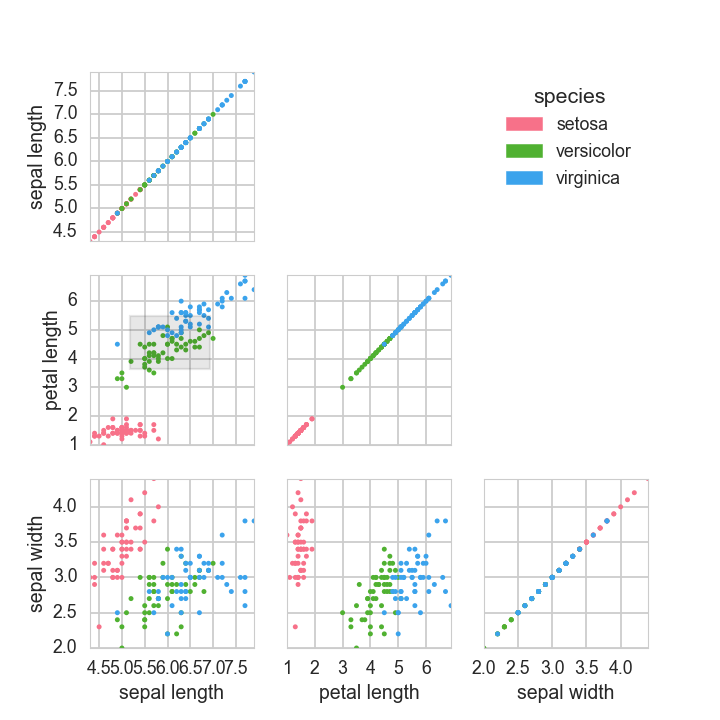

In [208]:
w = widgets.HTML()
feature_list = [data['sepal length'],
                data['petal length'],
                data['sepal width']]
b = Brusher(data, feature_list, color_by=data['species'])
w

In [213]:
data['petal length'].filter(b.x_series<5)

False    1.4
True     1.4
True     1.4
True     1.4
False    1.4
False    1.4
True     1.4
False    1.4
True     1.4
True     1.4
False    1.4
True     1.4
True     1.4
True     1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
True     1.4
False    1.4
True     1.4
False    1.4
False    1.4
False    1.4
False    1.4
True     1.4
        ... 
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
False    1.4
Name: petal length, dtype: float64